# Retail Giant Assignment - Time Series Foreacasting - Notebook 1 (Sales)

# Initial Setup

In [3]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the Retail Giant Dataset
data = pd.read_csv('Global2.csv')
data.columns = ['Order date', 'Segment', 'Market', 'Sales', 'Quantity', 'Profit']
data['Order date'] = pd.to_datetime(data['Order date'],format = '%d-%m-%Y')
data['month_year'] = pd.to_datetime(data['Order date']).dt.to_period('M')
data = data.set_index('month_year')
data.head(12)

Order date      Segment  Market     Sales  Quantity     Profit
month_year                                                               
2012-07    2012-07-31     Consumer      US  2309.650         7   762.1845
2013-02    2013-02-05    Corporate    APAC  3709.395         9  -288.7650
2013-10    2013-10-17     Consumer    APAC  5175.171         9   919.9710
2013-01    2013-01-28  Home Office      EU  2892.510         5   -96.5400
2013-11    2013-11-05     Consumer  Africa  2832.960         8   311.5200
2013-06    2013-06-28    Corporate    APAC  2862.675         5   763.2750
2011-11    2011-11-07     Consumer    APAC  1822.080         4   564.8400
2012-04    2012-04-14     Consumer    APAC  5244.840         6   996.4800
2014-10    2014-10-14    Corporate      US  5083.960         5  1906.4850
2012-01    2012-01-28     Consumer      US  4297.644        13 -1862.3124
2011-04    2011-04-05    Corporate      US  4164.050         5    83.2810
2012-04    2012-04-19    Corporate    APAC  4626.150         5   647.5500

In [5]:
# checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 51290 entries, 2012-07 to 2012-05
Freq: M
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order date  51290 non-null  datetime64[ns]
 1   Segment     51290 non-null  object        
 2   Market      51290 non-null  object        
 3   Sales       51290 non-null  float64       
 4   Quantity    51290 non-null  int64         
 5   Profit      51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.7+ MB


In [6]:
#checking the shape
data.shape

(51290, 6)

In [7]:
data.describe()

Sales      Quantity        Profit
count  51290.000000  51290.000000  51290.000000
mean     246.490581      3.476545     28.610982
std      487.565361      2.278766    174.340972
min        0.444000      1.000000  -6599.978000
25%       30.758625      2.000000      0.000000
50%       85.053000      3.000000      9.240000
75%      251.053200      5.000000     36.810000
max    22638.480000     14.000000   8399.976000

In [8]:
# merge the segment and market columns
data['market_segment'] = data['Market']+data['Segment']
data.head()

Order date      Segment  Market     Sales  Quantity    Profit  market_segment
month_year                                                                              
2012-07    2012-07-31     Consumer      US  2309.650         7  762.1845      USConsumer
2013-02    2013-02-05    Corporate    APAC  3709.395         9 -288.7650   APACCorporate
2013-10    2013-10-17     Consumer    APAC  5175.171         9  919.9710    APACConsumer
2013-01    2013-01-28  Home Office      EU  2892.510         5  -96.5400   EUHome Office
2013-11    2013-11-05     Consumer  Africa  2832.960         8  311.5200  AfricaConsumer

In [9]:
#checking the details after creation of market_segment column
print(data.shape)
data.info()

(51290, 7)
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 51290 entries, 2012-07 to 2012-05
Freq: M
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order date      51290 non-null  datetime64[ns]
 1   Segment         51290 non-null  object        
 2   Market          51290 non-null  object        
 3   Sales           51290 non-null  float64       
 4   Quantity        51290 non-null  int64         
 5   Profit          51290 non-null  float64       
 6   market_segment  51290 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 3.1+ MB


In [10]:
data.market_segment.value_counts()

APACConsumer         5699
LATAMConsumer        5321
USConsumer           5191
EUConsumer           5186
APACCorporate        3283
EUCorporate          3077
LATAMCorporate       3053
USCorporate          3020
EMEAConsumer         2538
AfricaConsumer       2381
APACHome Office      2020
LATAMHome Office     1920
USHome Office        1783
EUHome Office        1737
EMEACorporate        1574
AfricaCorporate      1312
EMEAHome Office       917
AfricaHome Office     894
CanadaConsumer        202
CanadaCorporate       110
CanadaHome Office      72
Name: market_segment, dtype: int64

# Finding the coefficient of Variation (COV) for all market segments to choose the best market segment having high and consistent profits.

In [11]:
# create pivot table for grouping the data based on market segments
market_segment_pvt = pd.pivot_table(index = 'month_year', columns = 'market_segment', values = 'Profit', aggfunc = 'sum', data = data)
market_segment_pvt

market_segment  APACConsumer  APACCorporate  APACHome Office  AfricaConsumer  AfricaCorporate  AfricaHome Office  CanadaConsumer  CanadaCorporate  CanadaHome Office  EMEAConsumer  EMEACorporate  EMEAHome Office  EUConsumer  EUCorporate  EUHome Office  LATAMConsumer  LATAMCorporate  LATAMHome Office  USConsumer  USCorporate  USHome Office
month_year                                                                                                                                                                                                                                                                                                                                         
2011-01             991.2825        11.5998          86.4423         475.683          219.096            856.710            3.12             5.70                NaN     -2099.364       1555.512          116.400   -845.8290     501.9315       975.3600     1976.98976      1150.88400        -106.48800    762.8067     300.9145      1383.0499
2011-02            1338.8688      4358.8254        -417.4128        1441.926         -490.551            820.302           23.31              NaN              87.99       267.060        982.092          216.690  -1808.1180    2988.4065      -181.0410      902.37752       721.25420         300.19936    500.2865     307.2995        58.1420
2011-03            3747.1632      1213.3386         923.7492         322.140         -586.716             67.320          335.55              NaN              84.03      1598.718        390.102           78.972   2480.5410     736.9890       503.2230     2585.17924        39.07512         285.46400    597.2773     333.0515      -431.5989
2011-04            3846.4746        71.0265         657.1080         292.122          776.691            500.136           55.08              NaN                NaN      -300.879         93.900         -420.090   2496.6405    1056.1785        63.8580      387.72148       259.25600        -421.73440   1155.0757    1393.3828       940.3767
2011-05            3639.9423      2534.1672        -272.1717         110.004          241.338             34.926           77.97              NaN                NaN       568.302        -24.270          262.968    254.0805    1586.2740       201.1020     1002.34724      -531.74444        -240.11600    698.9171    2063.5013       -23.7088
2011-06            4328.2596      1435.8294        3452.1018       -1290.639         -259.218           -774.801            7.50            40.08              23.40      -267.030       2075.010        -2371.776   4317.4515    2270.8170      1210.2930     1039.27972      2558.46696         643.69764   3486.7664      67.0149      1422.7431
2011-07            1258.9617       525.4647         -42.0498         621.168          134.847           -506.562           47.28           528.33               8.40      -942.603        273.756         -150.114    760.6920     916.9500       418.9350     1906.45620       303.29032         363.28400  -2227.2786    1308.7058        77.0902
2011-08             775.8066      4070.5581         775.7616         232.917          915.885           1090.200           43.68            29.70                NaN       285.270       -106.146          183.276   5498.6715    1626.2670       184.6140     1946.89372       180.54028         661.66792   2157.7522    2245.4838       914.8690
2011-09            5181.4449      1952.4675         623.3595         -86.163          950.766           1345.740          134.01            10.17                NaN      1012.101       -830.574         1151.358   5921.8785    5390.6625      2492.9010     1632.48620       386.77900         179.39744   8312.1203    -948.1010       964.0801
2011-10            6911.9970      5452.2429        1131.9597         612.942          -97.821            387.312           35.43              NaN                NaN        68.628      -1508.691           -6.867   1747.2810     135.4470       427.7970     5283.

In [12]:
# split the data of the pivot table to train and test
train_len = 42
train = market_segment_pvt[0:train_len]
test = market_segment_pvt[train_len:]
print(train.shape)
print(test.shape)

(42, 21)
(6, 21)


In [13]:
#Calculate the COV on the train set for profit
#train.mean()
#train.std()
cov = train.std()/train.mean()
cov.sort_values(ascending = True)

market_segment
APACConsumer         0.603633
EUConsumer           0.655334
LATAMConsumer        0.688935
EUCorporate          0.697702
APACCorporate        0.740799
LATAMCorporate       0.890930
USCorporate          1.039660
APACHome Office      1.061530
USConsumer           1.108571
EUHome Office        1.128192
CanadaCorporate      1.219189
USHome Office        1.231887
LATAMHome Office     1.359984
AfricaConsumer       1.446661
CanadaConsumer       1.497032
AfricaCorporate      1.685008
AfricaHome Office    2.013987
CanadaHome Office    2.245148
EMEAConsumer         2.749927
EMEAHome Office      6.140222
EMEACorporate        6.861820
dtype: float64

#### Lowest Coefficient of variance is for APAC Consumer market segment.So we will be forecasting for this segment as the standard deviation relative to the mean is very less. This means this segment is very stable in terms of profit and the segment is consistent as the variance is low compared to other segments.

# Forecasting the Sales based on Smoothing and AR Forecasting Tecniques

In [14]:
# Create a new dataframe by filtering on APAC Consumer
APAC_CONS = data[data['market_segment'] == 'APACConsumer']
APAC_CONS['Order date'] = pd.to_datetime(APAC_CONS['Order date'], format='%d-%m-%Y')
APAC_CONS['month_year'] = pd.to_datetime(APAC_CONS['Order date']).dt.to_period('M')
APAC_CONS = APAC_CONS.set_index('Order date')
APAC_CONS.sort_values(by=['month_year'], inplace=True)
APAC_CONS.head()
#APAC_CONS['Order date'] = APAC_CONS.datetime.values.astype(np.int64)
#drop the columns not required for the forecast

Segment Market     Sales  Quantity    Profit market_segment month_year
Order date                                                                         
2011-01-03  Consumer   APAC  337.6395         3 -122.8005   APACConsumer    2011-01
2011-01-03  Consumer   APAC   68.8680         2  -26.4120   APACConsumer    2011-01
2011-01-31  Consumer   APAC   62.1000         6   18.5400   APACConsumer    2011-01
2011-01-24  Consumer   APAC  139.2000         8   65.2800   APACConsumer    2011-01
2011-01-31  Consumer   APAC   32.1000         2    9.3000   APACConsumer    2011-01

In [15]:
# APAC_cons pivot to group the sales in Monthly fashion
APAC_CONS_PVT = pd.pivot_table(index = 'month_year', values = 'Sales', aggfunc = 'sum', data = APAC_CONS)
APAC_CONS_PVT

Sales
month_year            
2011-01     15711.7125
2011-02     12910.8588
2011-03     19472.5632
2011-04     15440.3046
2011-05     24348.9723
2011-06     27260.0196
2011-07     15842.8317
2011-08     22012.2366
2011-09     34613.1849
2011-10     36472.0470
2011-11     37722.6039
2011-12     37846.9911
2012-01     31280.8635
2012-02     24985.6881
2012-03     14241.1761
2012-04     20926.4721
2012-05     32608.6212
2012-06     39710.0352
2012-07      8389.7316
2012-08     48444.7977
2012-09     28193.2236
2012-10     56743.0833
2012-11     51967.0140
2012-12     47343.6267
2013-01     31328.2620
2013-02     20999.7378
2013-03     28414.6209
2013-04     20508.7197
2013-05     47979.6000
2013-06     70436.8089
2013-07     34596.8247
2013-08     45251.6439
2013-09     51513.2235
2013-10     53448.5532
2013-11     47812.7784
2013-12     51717.6204
2014-01     37924.3296
2014-02     21584.5086
2014-03     46340.1096
2014-04     32897.5062
2014-05     53544.8328
2014-06     51483.7011
2014-07     36524.3028
2014-08     63521.7729
2014-09     44477.2662
2014-10     77379.8286
2014-11     82286.3583
2014-12     60292.1310

# Outlier Detection

In [16]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=APAC_CONS_PVT['Sales'],whis=1.5)
# No Outlier treatment will be done as no outliers

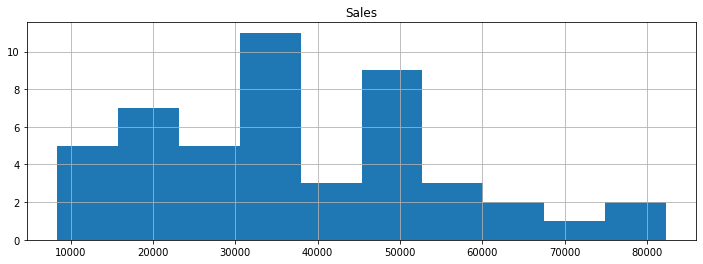

In [17]:
fig = APAC_CONS_PVT.hist(figsize = (12,4))

# Plot Time Series Data

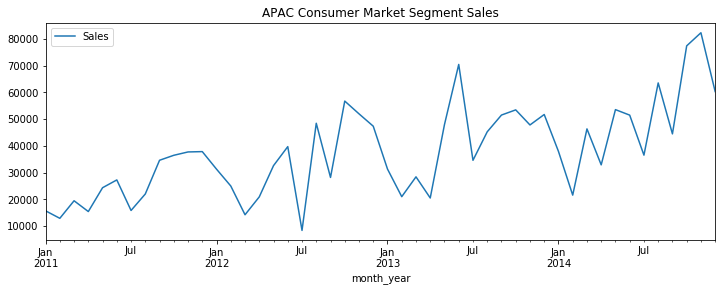

In [18]:
APAC_CONS_PVT.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC Consumer Market Segment Sales')
plt.show(block=False)

# Time Series Decomposition

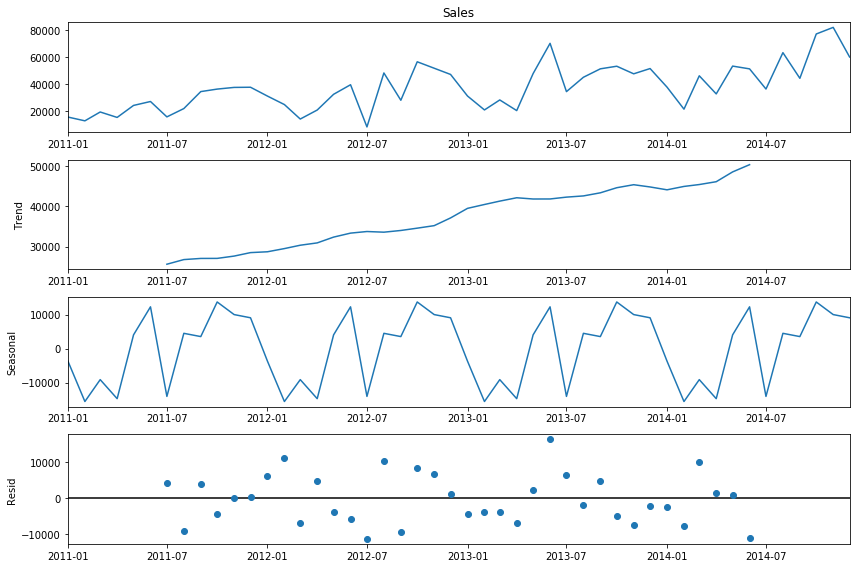

In [19]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

rcParams['figure.figsize'] = 12, 8
APAC_CONS_PVT.index=APAC_CONS_PVT.index.to_timestamp()
#APAC_CONS_PVT.head()
decomposition = sm.tsa.seasonal_decompose(APAC_CONS_PVT.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

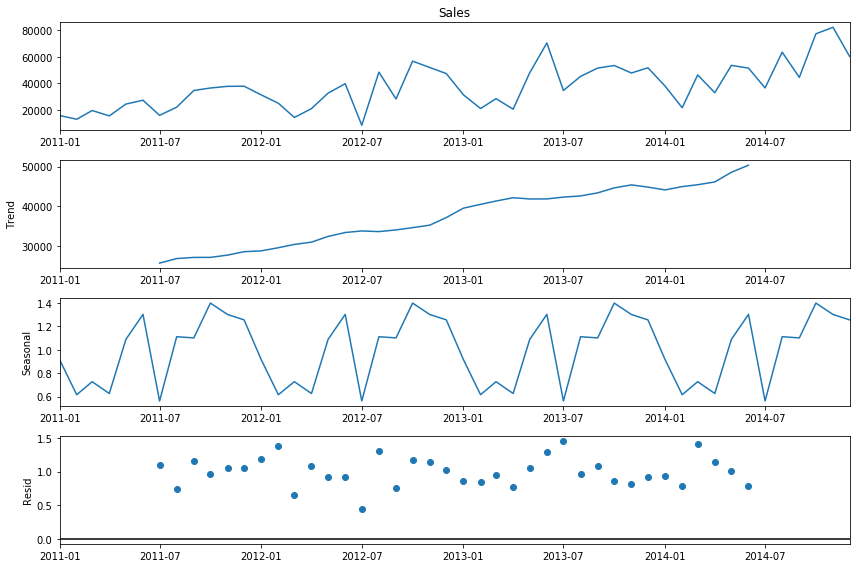

In [20]:
decomposition = sm.tsa.seasonal_decompose(APAC_CONS_PVT.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

#### After the decomposition we can see that the data has trend as well as seasonality.Also the levels are not increasing significantly. Hence we can consider the Holt-Winter's Exponential Smoothing-Additive method for forecasting in Exponential Smoothing techniques. In the Auto Regression series of models, the SARIMA model will give the best results as it will take into consideration both trend as well as seasonality.

In [21]:
# Build and Evaluate the Time Series Forecast
train_len = 42
train = APAC_CONS_PVT[0:train_len] # first 42 months as training set
test = APAC_CONS_PVT[train_len:] # last 6 months as out-of-time test set

In [22]:
print(train.shape)
print(test.shape)

(42, 1)
(6, 1)


# Exponential smoothing methods

## Simple exponential smoothing

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

### Plot train, test and forecast

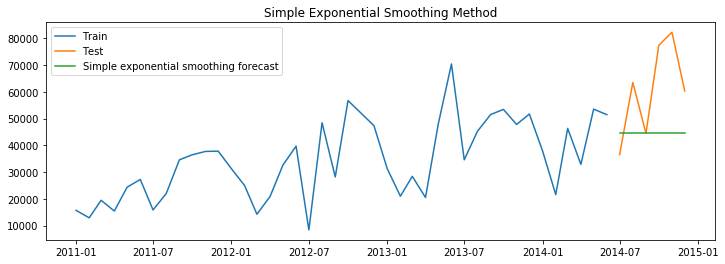

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0  Simple exponential smoothing forecast  22992.34  27.73

## Holt's Exponential Smoothing

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 5.089421403418267e-11, 'smoothing_slope': 4.863569823892523e-12, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 16642.50843404033, 'initial_slope': 804.3747157020065, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

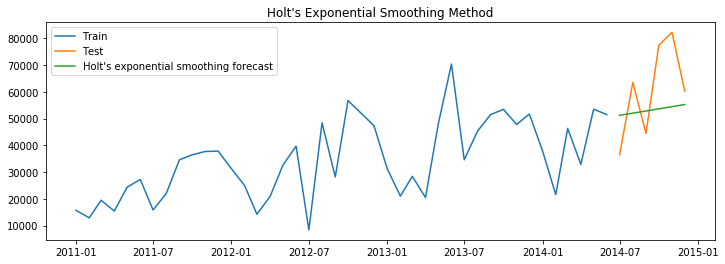

In [27]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [28]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0  Simple exponential smoothing forecast  22992.34  27.73
0    Holt's exponential smoothing method  17233.27  25.00

## Holt Winters' Exponential Smoothing (additive method)

In [29]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474947, 'damping_slope': nan, 'initial_level': 29061.29189999959, 'initial_slope': 730.4167145833233, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

In [30]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [31]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0  Simple exponential smoothing forecast  22992.34  27.73
0    Holt's exponential smoothing method  17233.27  25.00
0          Holt Winters' additive method  12971.01  17.61

## Holt Winter's Exponential Smoothing (multiplicative method)

In [32]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.2919, 'initial_slope': 730.4167145833336, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

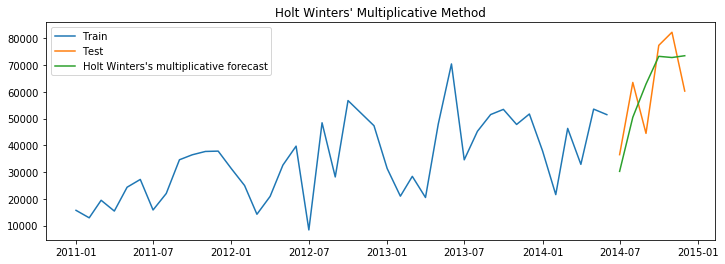

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [34]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0  Simple exponential smoothing forecast  22992.34  27.73
0    Holt's exponential smoothing method  17233.27  25.00
0          Holt Winters' additive method  12971.01  17.61
0    Holt Winters' multiplicative method  11753.42  19.62

# Auto Regressive methods

## Checking the stationarity

### Augmented Dickey-Fuller (ADF) test

In [35]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(APAC_CONS_PVT['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])
# p-value is greater than 0.05.The series is not stationary.

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [36]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(APAC_CONS_PVT['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

# series is not stationary as p-value is less than 0.05

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


### Box Cox transformation for making variance constant

In [37]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(APAC_CONS_PVT['Sales'], lmbda=0), index = APAC_CONS_PVT.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

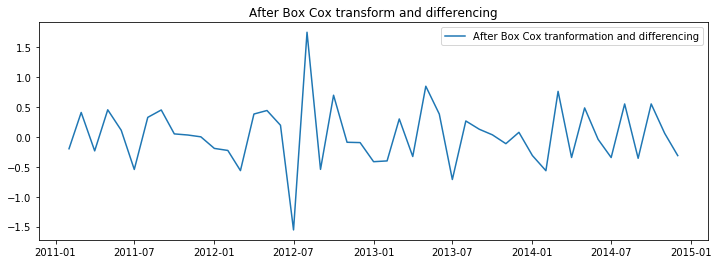

In [38]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), APAC_CONS_PVT.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [39]:
# Before dropping the NA values
data_boxcox_diff

month_year
2011-01-01         NaN
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
2014-07-01   -0.343287


In [40]:
data_boxcox_diff.dropna(inplace=True)

In [41]:
# After dropping NA values
data_boxcox_diff

month_year
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
2014-07-01   -0.343287
2014-08-01    0.553405


### Augmented Dickey-Fuller (ADF) test

In [42]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])
# p value is less than 0.05.The series is stationary.

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


In [43]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])
# p value is greater than 0.05.The series is stationary

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


## Autocorrelation function (ACF)

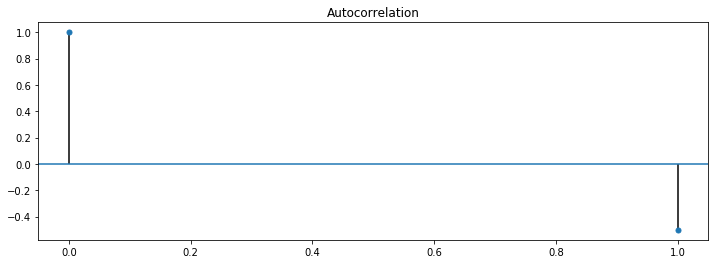

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 1)
plt.show()

## Partial autocorrelation function (PACF)

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 1)
plt.show()

In [46]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [47]:
train_data_boxcox_diff

month_year
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
Freq: MS, dtype: float64

## Auto regression method (AR)

In [48]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover original time series

In [49]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

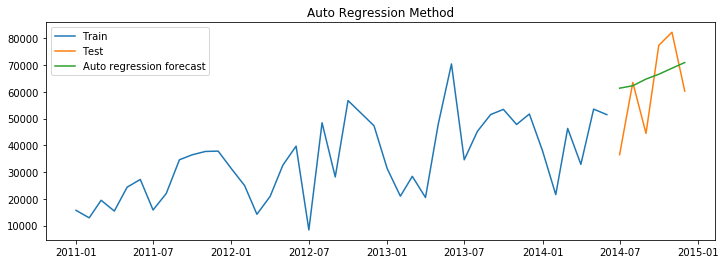

In [50]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [51]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0  Simple exponential smoothing forecast  22992.34  27.73
0    Holt's exponential smoothing method  17233.27  25.00
0          Holt Winters' additive method  12971.01  17.61
0    Holt Winters' multiplicative method  11753.42  19.62
0             Autoregressive (AR) method  15505.02  27.27

## Moving average method (MA)

In [52]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [53]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

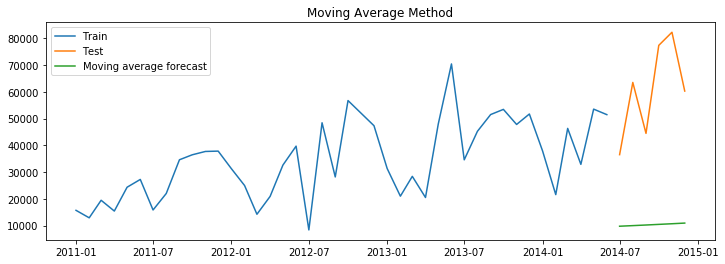

In [54]:
plt.figure(figsize=(12,4))
plt.plot(APAC_CONS_PVT['Sales'][:train_len], label='Train')
plt.plot(APAC_CONS_PVT['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [55]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0  Simple exponential smoothing forecast  22992.34  27.73
0    Holt's exponential smoothing method  17233.27  25.00
0          Holt Winters' additive method  12971.01  17.61
0    Holt Winters' multiplicative method  11753.42  19.62
0             Autoregressive (AR) method  15505.02  27.27
0             Moving Average (MA) method  52903.35  81.64

## Auto regression moving average method (ARMA)

In [56]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115923
ma.L1.y   -0.999930
dtype: float64


### Recover original time series

In [57]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

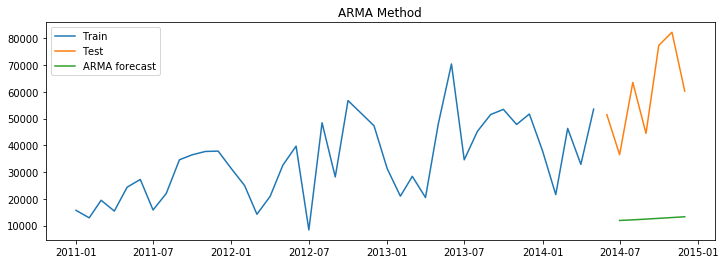

In [58]:
plt.figure(figsize=(12,4))
plt.plot(APAC_CONS_PVT['Sales'][:train_len-1], label='Train')
plt.plot(APAC_CONS_PVT['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [59]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0        Simple exponential smoothing forecast  22992.34  27.73
0          Holt's exponential smoothing method  17233.27  25.00
0                Holt Winters' additive method  12971.01  17.61
0          Holt Winters' multiplicative method  11753.42  19.62
0                   Autoregressive (AR) method  15505.02  27.27
0                   Moving Average (MA) method  52903.35  81.64
0  Autoregressive moving average (ARMA) method  50757.59  77.66

## Auto regressive integrated moving average (ARIMA)

In [60]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115923
ma.L1.D.y   -0.999930
dtype: float64


### Recover original time series forecast

In [61]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

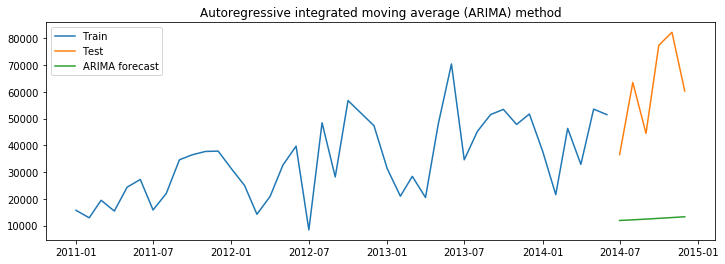

In [62]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [63]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method      RMSE   MAPE
0              Simple exponential smoothing forecast  22992.34  27.73
0                Holt's exponential smoothing method  17233.27  25.00
0                      Holt Winters' additive method  12971.01  17.61
0                Holt Winters' multiplicative method  11753.42  19.62
0                         Autoregressive (AR) method  15505.02  27.27
0                         Moving Average (MA) method  52903.35  81.64
0        Autoregressive moving average (ARMA) method  50757.59  77.66
0  Autoregressive integrated moving average (ARIM...  50757.59  77.66

## Seasonal auto regressive integrated moving average (SARIMA)

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100436
ma.L1      -0.995510
ar.S.L12   -0.394835
ma.S.L12   -0.989601
sigma2      0.047218
dtype: float64


### Recover original time series forecast

In [65]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

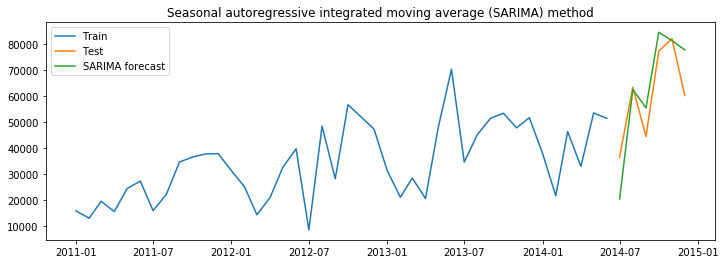

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

#### ARIMAX and SARIMAX models will not be applicable as there are no exogenous variables provided which impact the forecasting of Sales.

# Conclusion

#### The best forecasting tehnique in Exponential Smoothing is the Holt Winter's Exponential Smoothing with the additive method.The MAPE and RMSE values are significantly lower than other smoothing methods.It captures the seasonality as well as trend of the forecast of the next 6 months effectively.
#### #### The best forecasting tehnique in Auto Regression Models is the Seasonal Autoregressive Integrated Moving Average method (SARIMA).The MAPE and RMSE values are significantly lower than other AR techniques.It captures the seasonality as well as trend of the forecast of the next 6 months effectively.
#### This matches with the assumptions of the forecasting techniques we predicted earlier based on the flowchart for forecasting the Sales.